# World Happiness Score of 2015

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('2015.csv')

# EDA

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.shape

(158, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [11]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [16]:
df['Happiness Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158])

In [19]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

# Visualization

C:\Users\acer\AppData\Local\Temp\ipykernel_15480\3403324315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y='Country', x='Happiness Score', data=top10.sort_values('Happiness Score', ascending=False), palette='viridis')
C:\Users\acer\AppData\Local\Temp\ipykernel_15480\3403324315.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], y='Country', x='Happiness Score', data=bottom10.sort_values('Happiness Score'), palette='viridis')


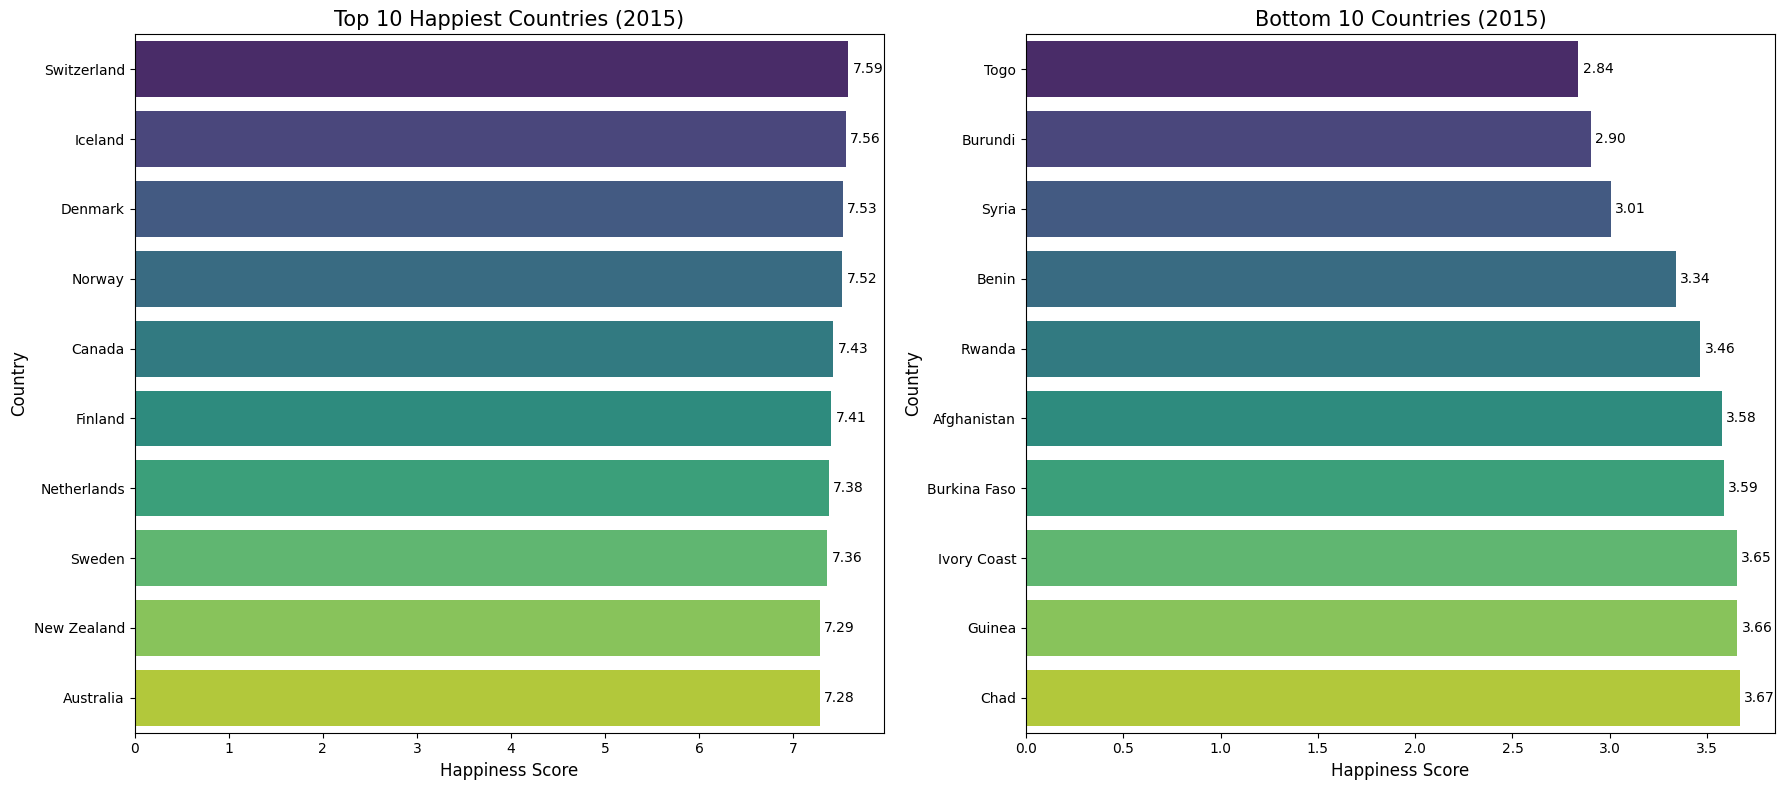

In [71]:
# Get the top 10 and bottom 10 countries by happiness score
top10 = df.nlargest(10, 'Happiness Score')
bottom10 = df.nsmallest(10, 'Happiness Score')

fig, axes = plt.subplots(1,2,figsize=(18,8))

# Top 10 countries
sns.barplot(ax=axes[0], y='Country', x='Happiness Score', data=top10.sort_values('Happiness Score', ascending=False), palette='viridis')
axes[0].set_xlabel('Happiness Score', fontsize=12)
axes[0].set_ylabel('Country', fontsize=12)
axes[0].set_title('Top 10 Happiest Countries (2015)', fontsize=15)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', padding=3)

# Bottom 10 countries
sns.barplot(ax=axes[1], y='Country', x='Happiness Score', data=bottom10.sort_values('Happiness Score'), palette='viridis')
axes[1].set_xlabel('Happiness Score', fontsize=12)
axes[1].set_ylabel('Country', fontsize=12)
axes[1].set_title('Bottom 10 Countries (2015)', fontsize=15)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

In [33]:
df['Happiness Score'].mean()

np.float64(5.375734177215189)